In [1]:
# Imports
import torchvision.transforms as transforms
import numpy as np
import random

# Code paths
import os
import sys
sys.path.append(os.path.split(os.getcwd())[0] + '\\salmon_component_tracking\\helpers')
from file_utils import create_salmon_tracking_config_file
from track_salmon import track_salmon
from motmetrics_evaluation import evaluate_tracker_motmetrics, evaluate_tracker_SintefCam
import gc


c:\Users\espen\miniconda3\envs\comptrackv2\Lib\site-packages\torchreid\reid\metrics\rank.py:11: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  warnings.warn(


In [2]:
# Specify paths

# M1 and M3
# salmon_tracking_root = r'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\benchmark\\model_1\\all\\'
# video_path = "C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\videos\\GH030031.mp4"
# obj_data_root = 'C:\\Users\\espen\\Documents\\work\\salmon_welfare_monitoring\\data\\annotated_data\\image_data\\full_frame\\salmon_component_detection\\with_global_salmon_IDs\\6_annotations\\'
# detection_model_path = r"C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\detector\\keybox_detection\\YOLO_models\\keybox_detection\\train5_model1\\weights\\best.pt"
# detector = 'keybox_detection'

# M2 and M4
salmon_tracking_root = r'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\benchmark\\model_4\\standard\\'
video_path = "C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\videos\\GH030031.mp4"
obj_data_root = 'C:\\Users\\espen\\Documents\\work\\salmon_welfare_monitoring\\data\\annotated_data\\image_data\\full_frame\\salmon_component_detection\\with_global_salmon_IDs\\6_annotations\\'
detection_model_path = r"C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\detector\\bounding_box_detection\\YOLO_models\\bounding_box_detection\\train2_model4\\weights\\best.pt"
detector = 'bounding_box_detection'

# M5
# salmon_tracking_root = r'C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\benchmark\\model_5\\all\\'
# video_path = "C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\videos\\20240508_121121_1715170281739114875_Korsneset_Merd07_22228352_B2Ave_cAIge.avi-0000_00h02m40s_00h00m40s_win.avi"
# obj_data_path = "C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\datasets\\without_boxes\\TS_val\\not_track\\output\\salmon_tracking\\analysis1\\MOT_results_labled.txt"
# detection_model_path = r"C:\\Users\\espen\\Documents\\work\\PhD\\papers\\salmon_tracking\\data\\detector\\keybox_detection\\YOLO_models\\keybox_detection\\train18_model5\\weights\\best.pt"
# detector = 'keybox_detection'

In [3]:
# Specify benchmark
benchmark = {}

# BoostTrack and BoostCompTrack
benchmark['trk_det_min_iou_threshold'] = [0.05, 0.2, 0.35, 0.50, 0.65] 

# All associators
# M1-M4: [3, 30]
# M5: [10, 50]
benchmark['max_hidden_length'] = [3,30]


In [4]:
# NB: Change salmon_conf, bp_conf and salmon_iou depending on detector
# M1-M4: video_shape [4242,4242], rotation 135, start_frame 14100, end_frame 14150
# M5: video_shape [1224,1024], rotation 0, start_frame 0, end_frame 999
# Only M1, M3 and M5 can be used with BoostCompTrack

# Track salmon
random.seed(2)
for max_hidden_length in benchmark['max_hidden_length']:
    for thresh_idx in range(len(benchmark['trk_det_min_iou_threshold'])):
        #CompTrack_max_cost = float(benchmark['CompTrack_max_cost'][thresh_idx])
        trk_det_min_iou_threshold = float(benchmark['trk_det_min_iou_threshold'][thresh_idx])
        for associator in ['BoostTrack']:
            config_file_path = salmon_tracking_root + r'\\config.yml'
            create_salmon_tracking_config_file(salmon_tracking_root,
                                            video_path,
                                            detection_model_path,
                                            associator,
                                            detector,
                                            use_embedding = False,
                                            project = 'max_hidden_length_' + str(max_hidden_length),
                                            start_frame = 14100,
                                            end_frame = 14150,
                                            video_shape = [4242,4242],
                                            rotate = 135,                            
                                            salmon_conf = 0.18, 
                                            bp_conf = 0.79, 
                                            bp_loc = 5,
                                            salmon_iou = 0.44, 
                                            max_hidden_length = max_hidden_length,
                                            min_hits = 0,
                                            trk_det_min_iou_threshold = trk_det_min_iou_threshold,
                                            debug = False,
                                            activate_turn = None,
                                            activate_salmon_error_bp_disagreement_check = None,
                                            activate_salmon_error_no_bp_overlap_check = None,
                                            activate_bp_error_bp_disagreement_check = None,
                                            use_ecc = False,             
                                            )
            
            analysis_path = track_salmon(config_file_path)

14100

0: 1024x1024 84 salmons, 42 heads, 9 dorsal_fins, 4 adi_fins, 58 tail_fins, 11 anal_fins, 4 pelv_fins, 7 pec_fins, 81 bodys, 28.3ms
Speed: 8.4ms preprocess, 28.3ms inference, 63.6ms postprocess per image at shape (1, 3, 1024, 1024)
14101

0: 1024x1024 91 salmons, 36 heads, 6 dorsal_fins, 4 adi_fins, 62 tail_fins, 11 anal_fins, 3 pelv_fins, 9 pec_fins, 78 bodys, 26.9ms
Speed: 6.7ms preprocess, 26.9ms inference, 5.5ms postprocess per image at shape (1, 3, 1024, 1024)
14102

0: 1024x1024 90 salmons, 36 heads, 7 dorsal_fins, 4 adi_fins, 60 tail_fins, 11 anal_fins, 3 pelv_fins, 11 pec_fins, 78 bodys, 26.9ms
Speed: 7.4ms preprocess, 26.9ms inference, 5.4ms postprocess per image at shape (1, 3, 1024, 1024)
14103

0: 1024x1024 88 salmons, 40 heads, 6 dorsal_fins, 5 adi_fins, 60 tail_fins, 11 anal_fins, 2 pelv_fins, 11 pec_fins, 77 bodys, 27.1ms
Speed: 6.5ms preprocess, 27.1ms inference, 3.9ms postprocess per image at shape (1, 3, 1024, 1024)
14104

0: 1024x1024 88 salmons, 42 heads, 8 d

BoostTrack max_hidden_length_3 analysis1
BoostTrack max_hidden_length_3 analysis2
BoostTrack max_hidden_length_3 analysis3
BoostTrack max_hidden_length_3 analysis4
BoostTrack max_hidden_length_3 analysis5
BoostTrack max_hidden_length_30 analysis1
BoostTrack max_hidden_length_30 analysis2
BoostTrack max_hidden_length_30 analysis3
BoostTrack max_hidden_length_30 analysis4
BoostTrack max_hidden_length_30 analysis5


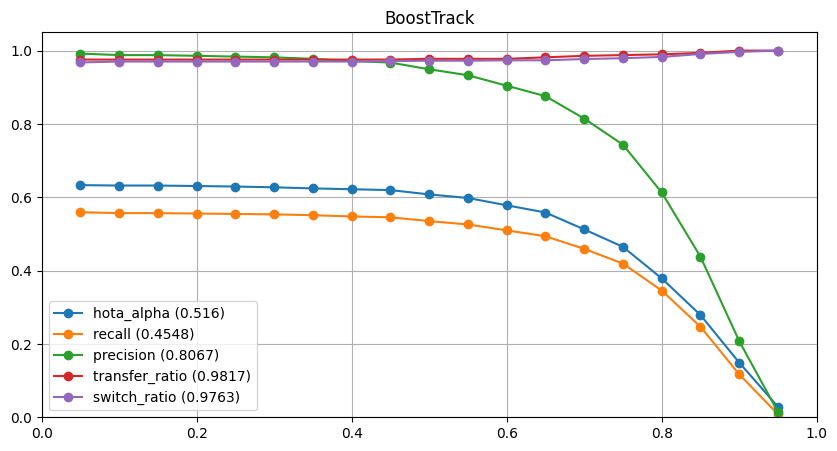

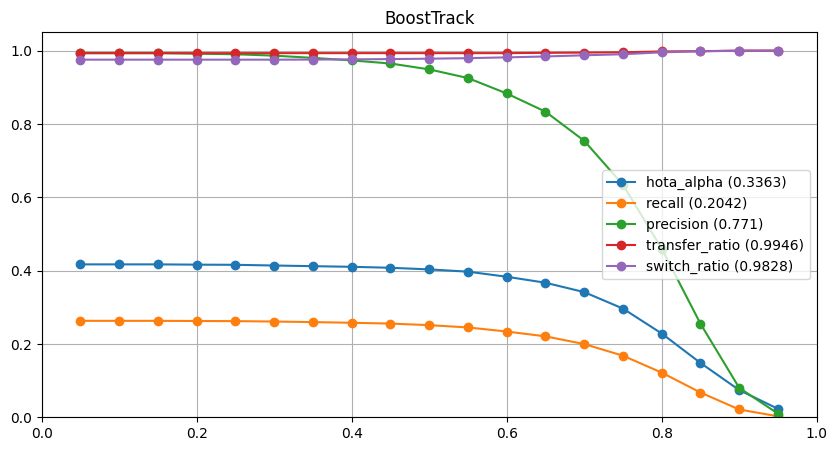

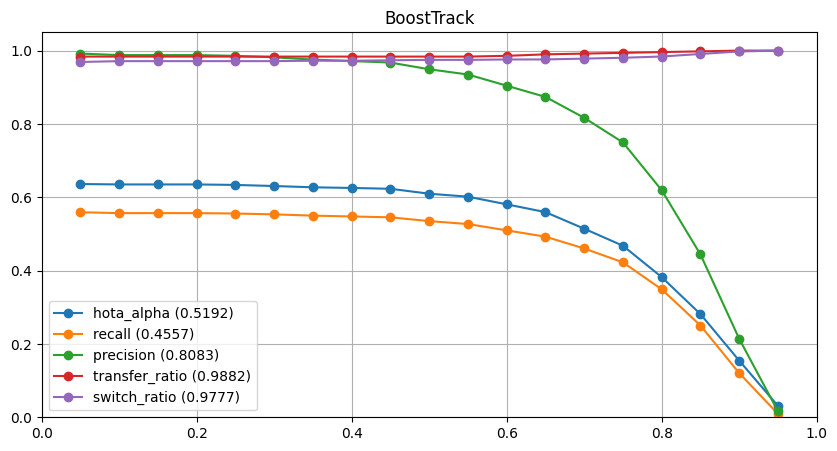

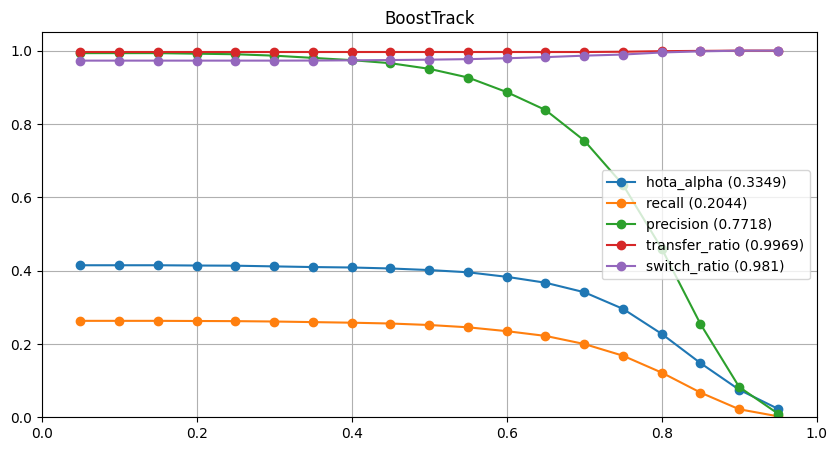

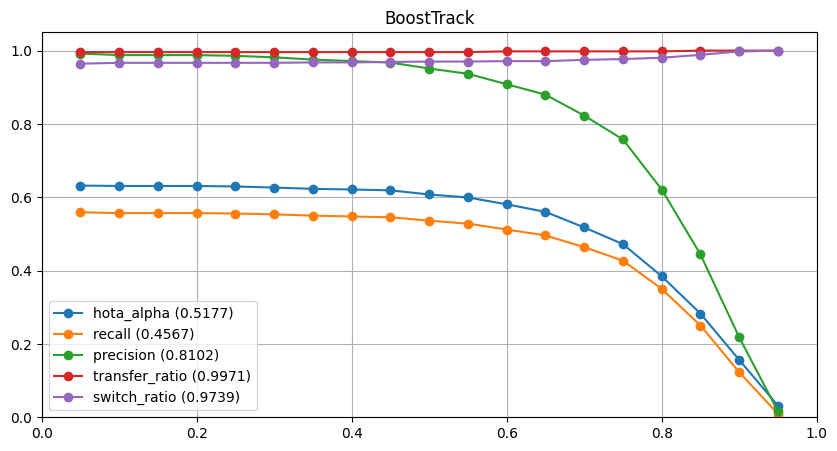

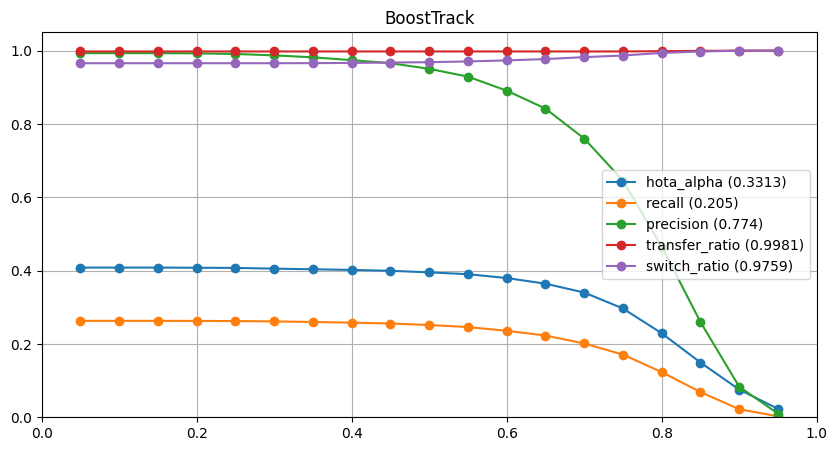

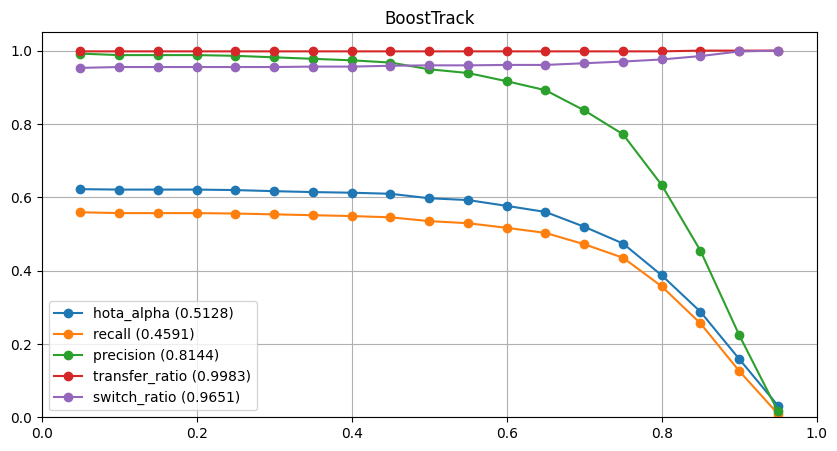

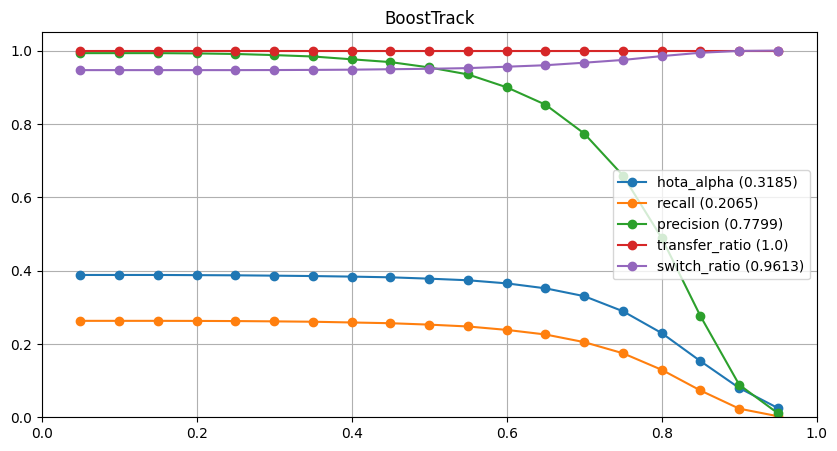

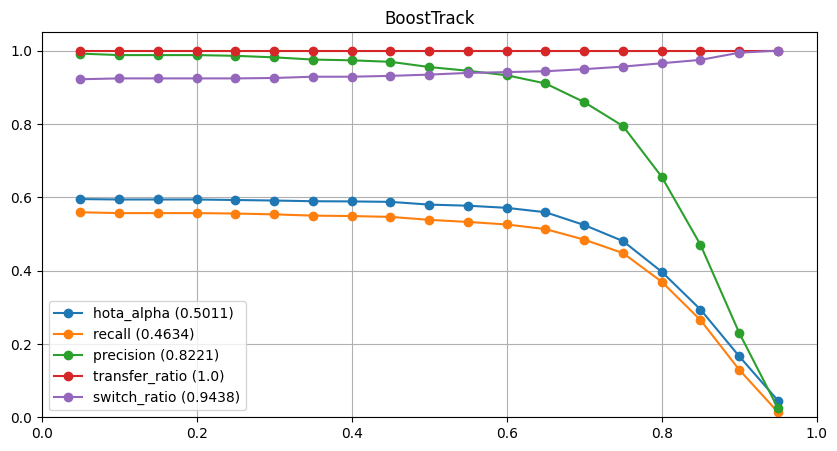

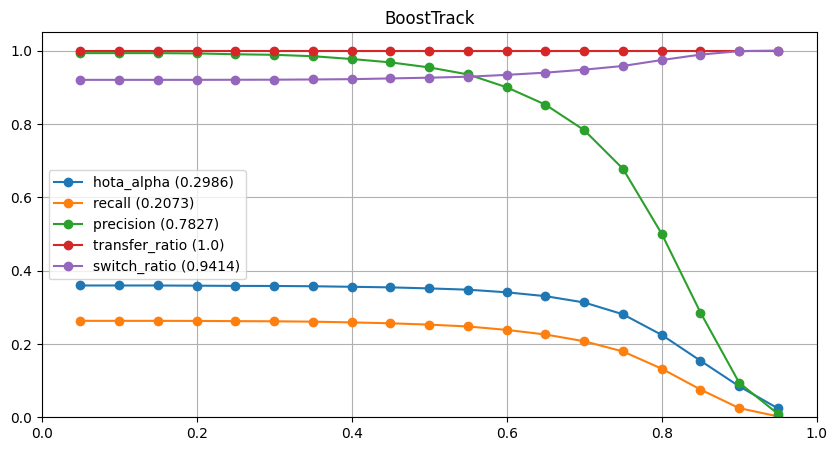

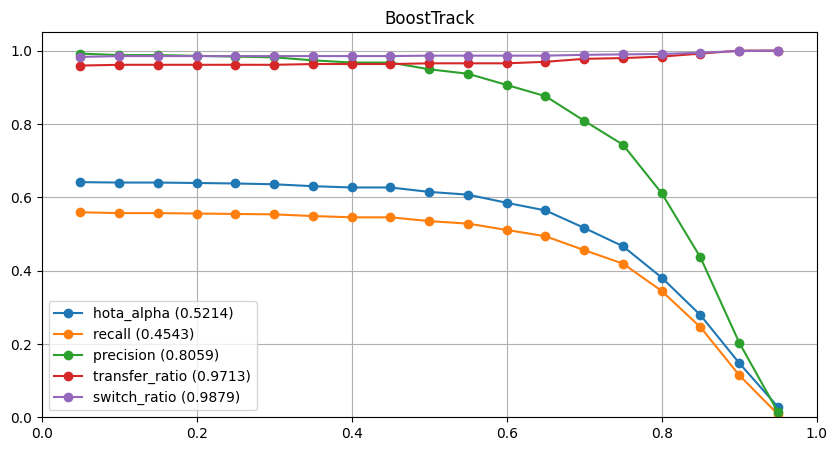

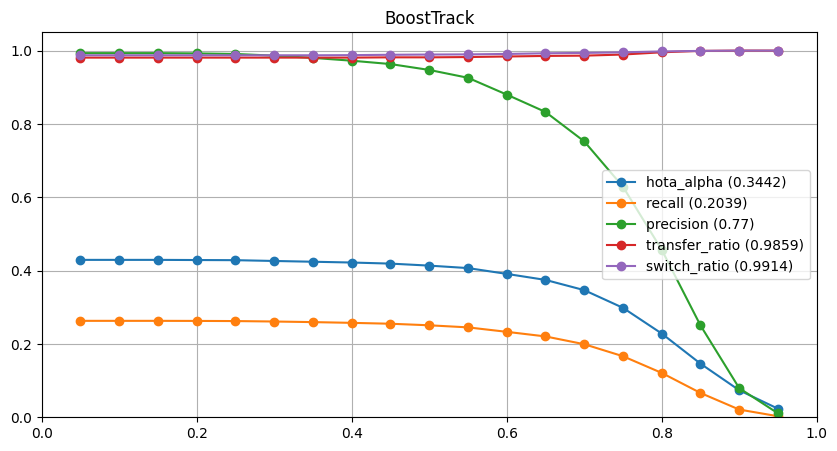

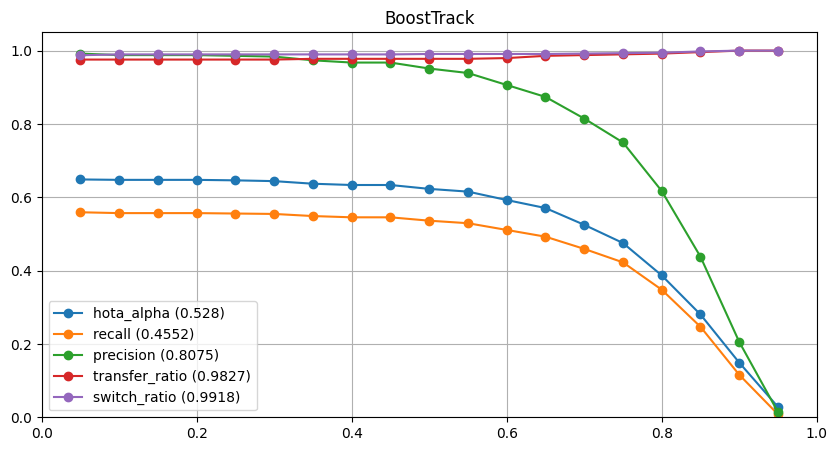

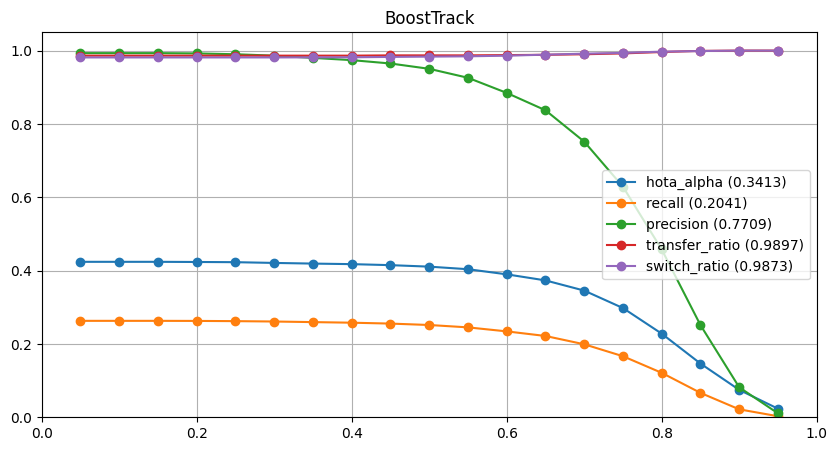

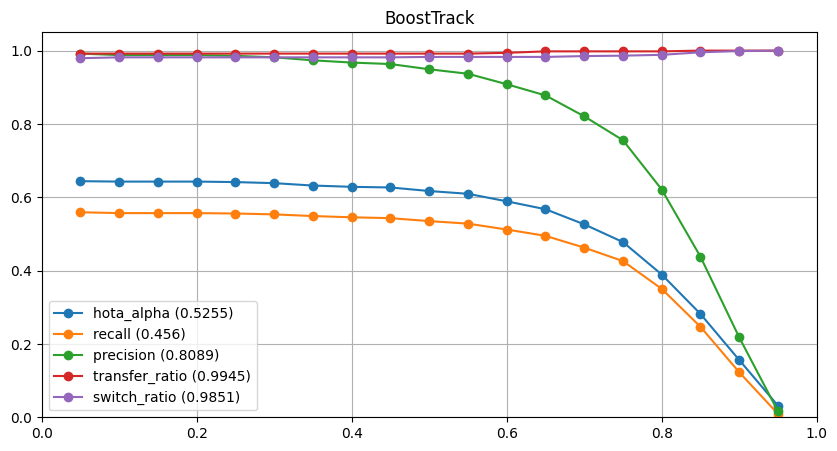

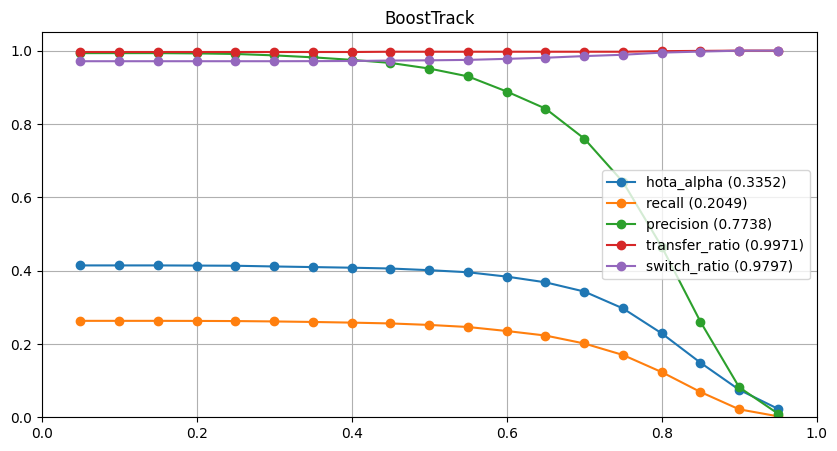

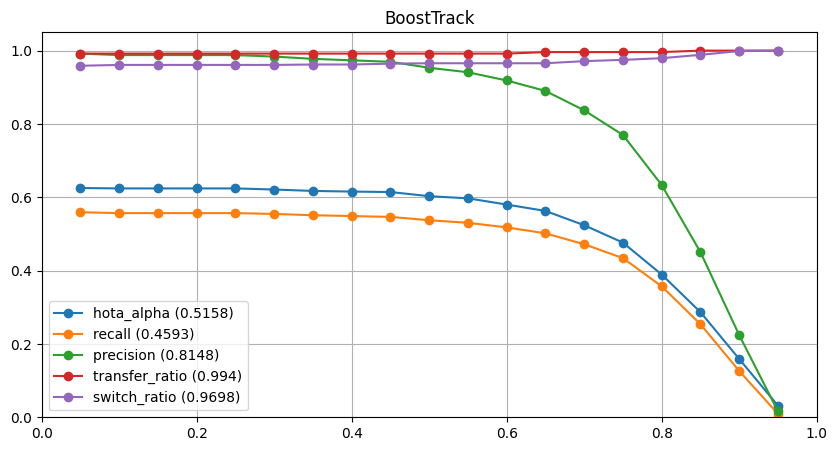

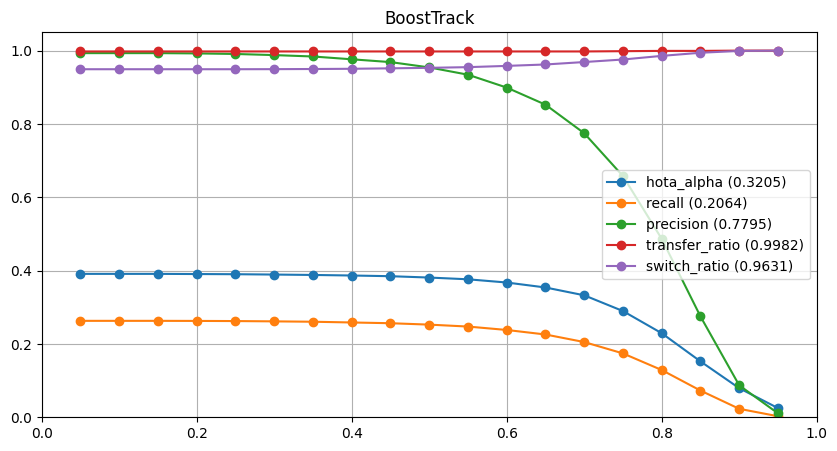

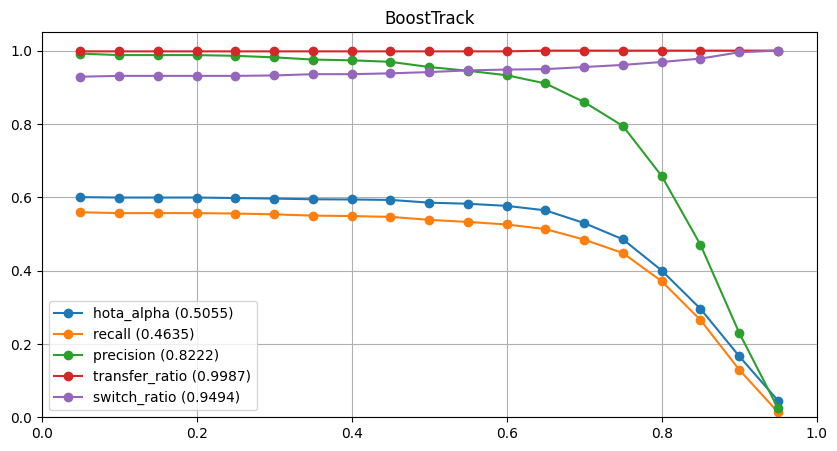

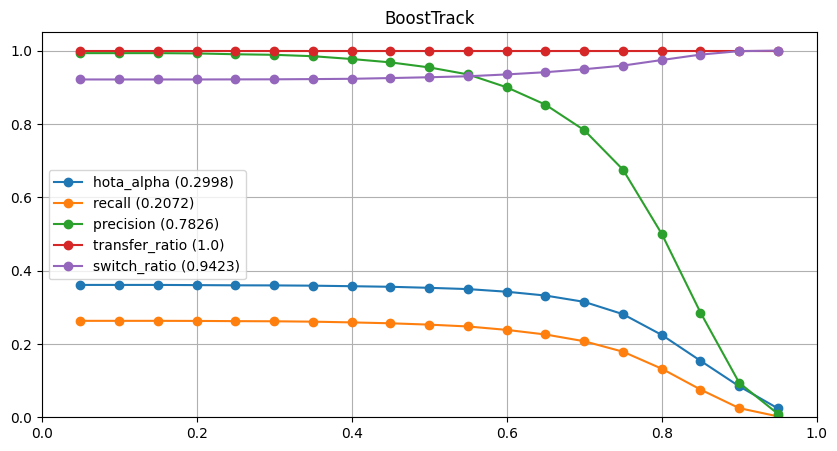

In [5]:
#Evaluate trackers

for associator in ['BoostTrack']:
    for hl in os.listdir(salmon_tracking_root + '\\associator\\' + associator + '\\output\\'):
        for analysis_num in os.listdir(salmon_tracking_root + '\\associator\\' + associator + '\\output\\' + hl):
            print(associator + ' ' + hl + ' ' + analysis_num)
            analysis_path = salmon_tracking_root + '\\associator\\' + associator + '\\output\\' + hl + '\\' + analysis_num
            hyp_data_path = analysis_path + '\\MOT_results.txt'

            # M5    
            #evaluate_tracker_SintefCam(obj_data_path, hyp_data_path, components = ['salmon'])
            
            # M1-M4
            acc, summary, th_list, motmetrics_path, trackers, gt = evaluate_tracker_motmetrics(obj_data_root, hyp_data_path, metrics = ["hota_alpha",'recall', 'precision', 'num_false_positives', 'num_misses', 'num_switches', 'num_transfer','num_matches','num_ascend','num_migrate'], components = ['salmon'], results_file_name = 'salmon_results')
            acc, summary, th_list, motmetrics_path, trackers, gt = evaluate_tracker_motmetrics(obj_data_root, hyp_data_path, metrics = ["hota_alpha",'recall', 'precision', 'num_false_positives', 'num_misses', 'num_switches', 'num_transfer','num_matches','num_ascend','num_migrate'], components = ['head', 'dorsal_fin', 'adi_fin', 'tail_fin', 'anal_fin','pelv_fin','pec_fin', 'body'], results_file_name = 'bp_results')


            